<a href="https://colab.research.google.com/github/sterlinggutterman/labs/blob/main/SG_PCA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams. Some of these scam e-mails have some offensive content. I don't think anything is worse than R-rated, but I just want to warn you that if you start reading the e-mail text, you might read something offensive. If that's a problem, feel free to e-mail me and we can talk about it more or you can skip the assignment.  

In [1]:
! git clone https://www.github.com/sterlinggutterman/labs

Cloning into 'labs'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 141 (delta 59), reused 68 (delta 39), pack-reused 41 (from 1)
Receiving objects: 100% (141/141), 22.87 MiB | 17.48 MiB/s, done.
Resolving deltas: 100% (66/66), done.


### Q1.

Open the `Phishing_Email.parquet` data. It is available at `https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet`, and you can download it directly using Pandas by providing that URL: `df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')`.

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The `Email Text` variable contains the actual text of the email and the `Email Type` takes the value `Phishing Email` or `Safe Email`. We want to predict which emails are phishing emails from their contents.

Use the `str.split()` method to break the `Phishing Email` values into **tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
from collections import Counter
from multiprocessing.pool import Pool
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')
df.head()

,index,Unnamed: 0,Email Text,Email Type
0,0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
tokens = df['Email Text'].str.split()
tokens.head()

,Email Text
0,"[re, :, 6, ., 1100, ,, disc, :, uniformitarian..."
1,"[the, other, side, of, *, galicismos, *, *, ga..."
2,"[re, :, equistar, deal, tickets, are, you, sti..."
3,"[Hello, I, am, your, hot, lil, horny, toy., I,..."
4,"[software, at, incredibly, low, prices, (, 86,..."


### Q2.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [5]:
with open('/content/labs/05_PCA/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?

In [6]:
df_tokens = pd.DataFrame(token_freq, columns=['token', 'count'])
df_tokens.head()

,token,count
0,new,1365
1,date,1202
2,get,1052
3,please,1022
4,enron,927


<Axes: >

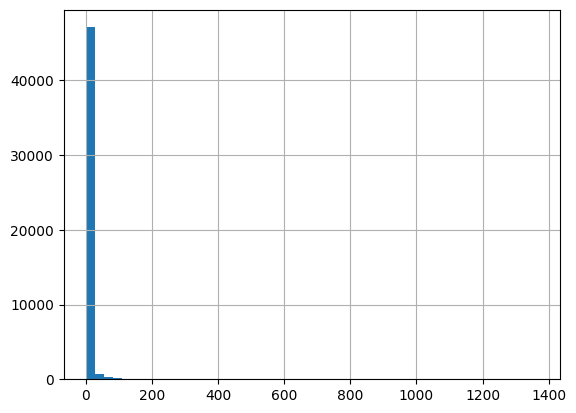

In [7]:
df_tokens['count'].hist(bins=50)

In [8]:
print(df_tokens['count'].describe)
print(df_tokens['count'].value_counts)

<bound method NDFrame.describe of 0        1365
1        1202
2        1052
3        1022
4         927
         ... 
48686       1
48687       1
48688       1
48689       1
48690       1
Name: count, Length: 48691, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0        1365
1        1202
2        1052
3        1022
4         927
         ... 
48686       1
48687       1
48688       1
48689       1
48690       1
Name: count, Length: 48691, dtype: int64>


### Q3.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [9]:
# new df
df = pd.read_parquet('/content/labs/05_PCA/Phishing_clean.parquet')
df.head()

,Email Type,new,date,get,please,enron,like,2002,would,one,...,ï¿½ï¿½,safety,yap,ypil,maintain,procedures,tip,elizabeth,leadership,italian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# splitting data 80/20
x = df.drop(['Email Type'], axis=1)
y = df['Email Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [11]:
# regression
from sklearn import linear_model
reg_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

print('test:')
y_hat_test = reg_model.predict(x_test)
print('R-squared: ', reg_model.score(x_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat_test)**2 ))
print('RMSE: ', rmse)

print('train:')
y_hat_train = reg_model.predict(x_train)
print('R-squared: ', reg_model.score(x_train,y_train))
rmse = np.sqrt( np.mean( (y_train - y_hat_train)**2 ))
print('RMSE: ', rmse)

test:
R-squared:  -4.037440534453595e+20
RMSE:  9823630209.073298
train:
R-squared:  0.6974927377808975
RMSE:  0.2684742540945642


In [12]:
# words with largest coefficients
df_words = pd.DataFrame({'variable':reg_model.feature_names_in_ , 'value':reg_model.coef_})
df_words['abs'] = np.abs(df_words['value'])
df_words.sort_values('abs',ascending=False)

,variable,value,abs
74,"2002,",1.220497e+13,1.220497e+13
1014,8859,-8.298006e+12,8.298006e+12
340,2005,-5.779494e+12,5.779494e+12
915,300,5.171208e+12,5.171208e+12
1133,"19,",4.791183e+12,4.791183e+12
...,...,...,...
757,regards,2.517700e-04,2.517700e-04
752,processing,-2.136230e-04,2.136230e-04
2558,"09,",2.166366e-05,2.166366e-05
64,week,1.525879e-05,1.525879e-05


Observations
- Train model performs fairly well, test model is severely overfit
- The most common variables are numbers, not words
- Despite not being able to see the entire table, it appears numbers are frequent throughout

### Q4.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

<Axes: >

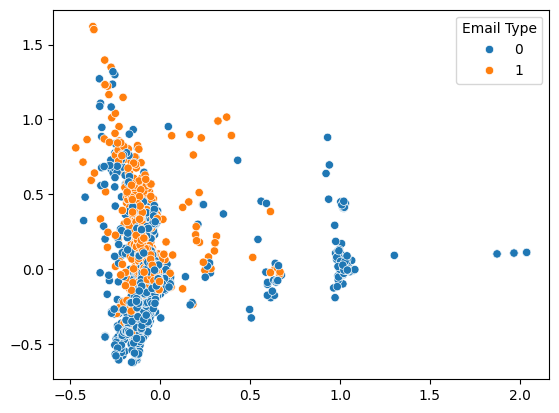

In [13]:
pca = PCA(n_components = 2)
pca = pca.fit(x_train)
train_pca = pca.transform(x_train)
test_pca = pca.transform(x_test)
sns.scatterplot(x=test_pca[:,0],y=test_pca[:,1],hue=y_test)

The orange dots, the scams, are concentrated with a low first component and a high second component.

### Q5.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [14]:
pca = PCA(n_components = 2610)
pca = pca.fit(x_train)
train_pca = pca.transform(x_train)
test_pca = pca.transform(x_test)

In [15]:
reg_model = LinearRegression(fit_intercept=False).fit(train_pca, y_train)

print('test:')
y_hat_test = reg_model.predict(test_pca)
print('R-squared: ', reg_model.score(test_pca,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat_test)**2 ))
print('RMSE: ', rmse)

print('train:')
y_hat_train = reg_model.predict(train_pca)
print('R-squared: ', reg_model.score(train_pca,y_train))
rmse = np.sqrt( np.mean( (y_train - y_hat_train)**2 ))
print('RMSE: ', rmse)

test:
R-squared:  0.03430630660661971
RMSE:  0.48043942012332785
train:
R-squared:  0.12342072275942628
RMSE:  0.4570148811546029


Observations
- The test model performs better after PCA and the train model performs worse. While it is surprising the train went down, it is encouraging that the test set increased because it evaluates the performance of predicted data and is more helpful in understanding patterns.

### Q6.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

PCA helps resolve the issue of over-fitting, providing a better understanding of how variables interact together. PCA separates variables that are contribute to multi-colinearity, showing which variables actually have an impact.